In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import acf
from statsmodels.graphics.tsaplots import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tools.eval_measures import mse
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import r2_score
import statsmodels.tsa.stattools as tsa
from statsmodels.tools import add_constant
import sys
%matplotlib notebook
def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)

In [2]:
break_df = pd.read_excel('break.xls')

In [3]:
exog = break_df['Y1']

<IPython.core.display.Javascript object>


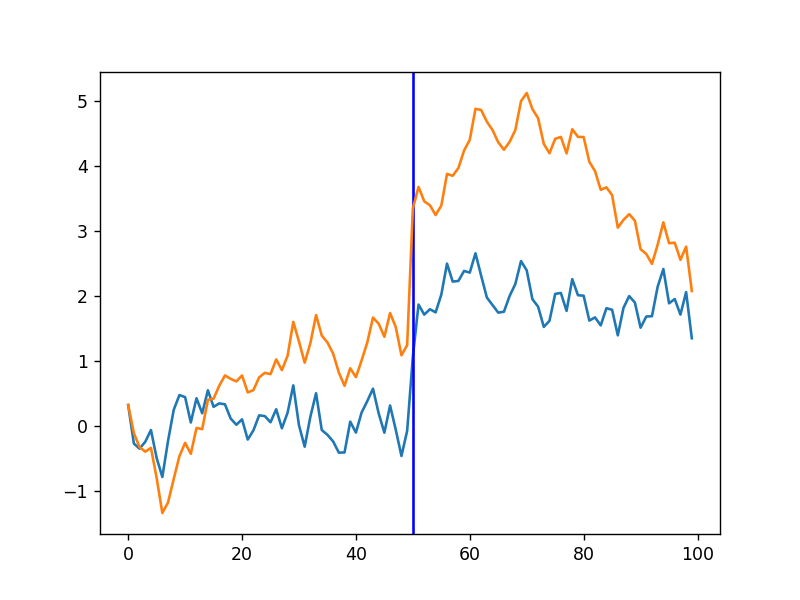

In [4]:
break_df['Y1'].plot()
plt.axvline(x = 50, color = 'b', label = 'axvline - full height')

Structural break around period 50.

In [5]:
adstat, pvalue, used_lag,*rest = tsa.adfuller(break_df['Y1'])
print("adfstat: ",adstat, "     ", "Pvalue: ", pvalue, "     ", "Num Lags: ",used_lag)

adfstat:  -1.7062968978336883       Pvalue:  0.42787108091713427       Num Lags:  0


In [6]:
acf_nums = acf(exog)

C:\Users\parik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\parik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [7]:
for x in range(6):
    print('\u03C1{}: {}'.format(get_sub(str(x)), acf_nums[x+1]))

ρ₀: 0.9421274868292613
ρ₁: 0.8775311761056256
ρ₂: 0.835511238594909
ρ₃: 0.8053577386671814
ρ₄: 0.7677767787707693
ρ₅: 0.7238774378846644


In [8]:
del_exog = exog - exog.diff()
len(del_exog[1:]),len(exog.diff())

(99, 100)

In [9]:
break_df['lagY1'] = break_df['Y1'].shift()
break_df['delY1'] = break_df['Y1'].diff()
break_df

,EPSILON,Y1,Y2,lagY1,delY1
0,0.3202,0.320200,0.3202,NaN,NaN
1,-0.4327,-0.272600,-0.1125,0.320200,-0.592800
2,-0.2150,-0.351300,-0.3275,-0.272600,-0.078700
3,-0.0699,-0.245550,-0.3974,-0.351300,0.105750
4,0.0582,-0.064580,-0.3392,-0.245550,0.180970
...,...,...,...,...,...
95,-0.3213,1.885376,2.8100,2.413353,-0.527977
96,0.0083,1.950988,2.8183,1.885376,0.065612
97,-0.2639,1.711594,2.5544,1.950988,-0.239394
98,0.2025,2.058297,2.7569,1.711594,0.346703


In [10]:
res = OLS(break_df['delY1'][1:],break_df['lagY1'][1:]).fit()

In [11]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  delY1   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.9701
Date:                Fri, 25 Mar 2022   Prob (F-statistic):                       0.327
Time:                        16:54:45   Log-Likelihood:                         -30.044
No. Observations:                  99   AIC:                                      62.09
Df Residuals:                      98   BIC:                                      64.68
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lagY1         -0.0233      0.024     -0.985      0.327      -0.070       0.024
==============================================================================
Omnibus:                        2.243   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.326   Jarque-Bera (JB):                1.736
Skew:                           0.309   Prob(JB):                        0.420
Kurtosis:                       3.195   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
trend = range(len(break_df))
break_df['trend'] = trend

In [13]:
res = OLS(break_df['delY1'][1:],add_constant(break_df['lagY1'][1:])).fit()

In [14]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  delY1   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.911
Date:                Fri, 25 Mar 2022   Prob (F-statistic):             0.0912
Time:                        16:54:45   Log-Likelihood:                -29.018
No. Observations:                  99   AIC:                             62.04
Df Residuals:                      97   BIC:                             67.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0661      0.046      1.425      0.157      -0.026       0.158
lagY1         -0.0566      0.033     -1.706      0.091      -0.122       0.009
==============================================================================
Omnibus:                        1.566   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.193
Skew:                           0.263   Prob(JB):                        0.551
Kurtosis:                       3.108   Cond. No.                         2.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
res = OLS(break_df['delY1'][1:],add_constant(break_df[['lagY1','trend']][1:])).fit()

In [16]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  delY1   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     3.752
Date:                Fri, 25 Mar 2022   Prob (F-statistic):             0.0270
Time:                        16:54:45   Log-Likelihood:                -26.757
No. Observations:                  99   AIC:                             59.51
Df Residuals:                      96   BIC:                             67.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0447      0.069     -0.644      0.521      -0.182       0.093
lagY1         -0.1522      0.056     -2.734      0.007      -0.263      -0.042
trend          0.0041      0.002      2.118      0.037       0.000       0.008
==============================================================================
Omnibus:                        0.567   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.402
Skew:                           0.156   Prob(JB):                        0.818
Kurtosis:                       3.008   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
break_df['Y2'].plot()

<AxesSubplot:>

In [18]:
bdate = 51

In [19]:
from chow_test import chowtest

chowtest(y=break_df['Y2'][1:], X=break_df['Y2'].shift()[1:],
         last_index_in_model_1=50,
         first_index_in_model_2=50,
         significance_level=.05)

ImportError: cannot import name 'chowtest' from 'chow_test' (C:\Users\parik\anaconda3\lib\site-packages\chow_test\__init__.py)